In [ ]:
#Set Up the Development Environment
!pip install torch torchvision ultralytics opencv-python pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 61.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-14 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


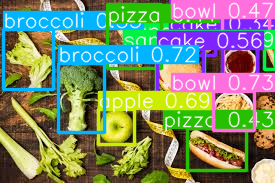

In [ ]:
# Step 2: Implement Food Detection (YOLO)
#Load YOLO Model

import torch

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Test detection on a sample image
image_path = '/content/food1.jpeg.jpg'
results = model(image_path)
results.show()


In [ ]:
# Step 3: Implement Portion Size Estimation
#Estimate Portion Size Using OpenCV

import cv2

def estimate_portion(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    portion_size = None

    for contour in contours:
        if cv2.contourArea(contour) > 1000:
            x, y, w, h = cv2.boundingRect(contour)
            portion_size = w * h  # Basic estimation
            break

    return portion_size

portion = estimate_portion('/content/low-fat-chicken-fillet-baked-with-ranch-seasoning-served-black-plate-with-broccoli-bacon_268847-723.jpg')
print("Estimated Portion Size:", portion)


Estimated Portion Size: 17584


In [ ]:
# Step 4: Implement Macronutrient Calculation
#Macronutrient Breakdown

import pandas as pd

# Load the dataset
df = pd.read_csv("test.csv")

def get_macronutrients(food_name, portion_size):
    # Ensure the 'Descrip' column is treated as a string
    df['Descrip'] = df['Descrip'].astype(str)

    # Find the food item in the dataset
    food_item = df[df['Descrip'].str.contains(food_name, case=False, na=False)]

    if food_item.empty:
        return f"Food item '{food_name}' not found in dataset."

    # Extract macronutrients
    energy = food_item.iloc[0]['Energy_kcal']
    protein = food_item.iloc[0]['Protein_g']
    fat = food_item.iloc[0]['Fat_g']
    carbs = food_item.iloc[0]['Carb_g']

    # Normalize based on portion size (assuming dataset values are per 100g)
    factor = portion_size / 100

    return {
        'Energy_kcal': energy * factor,
        'Protein_g': protein * factor,
        'Fat_g': fat * factor,
        'Carb_g': carbs * factor
    }

# Example usage
portion_size = 150  # in grams
food_name = 'Beef, chuck, under blade steak, boneless, separable lean and fat, trimmed to 0" fat, all grades, cooked, braised'
macros = get_macronutrients(food_name, portion_size)
print(macros)




{'Energy_kcal': 275.0, 'Protein_g': 28.23, 'Fat_g': 18.0, 'Carb_g': 0.0}


In [ ]:
# Step 5: Calorie & Macronutrient Calculation
# 1. Load the dataset

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/test.csv')

# Display first few rows to check structure
print(df.head())


      ID                       FoodGroup  \
0  23116                   Beef Products   
1  10047                   Pork Products   
2  15270  Finfish and Shellfish Products   
3   1259          Dairy and Egg Products   
4  19100                          Sweets   

                                             Descrip  Energy_kcal  Protein_g  \
0  Beef, chuck, under blade steak, boneless, sepa...        275.0      28.23   
1  Pork, fresh, loin, center rib (roasts), bone-i...        248.0      26.99   
2                Crustaceans, shrimp, untreated, raw         85.0      20.10   
3  Cheese spread, American or Cheddar cheese base...        176.0      13.41   
4    Candies, fudge, chocolate, prepared-from-recipe        411.0       2.39   

   Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  ...  Folate_USRDA  Niacin_USRDA  \
0  18.00    0.00     0.00      0.0       8.0  ...        0.0175      0.235750   
1  14.68    0.00     0.00      0.0       5.0  ...        0.0000      0.593125   
2   0.51   

In [ ]:
# 2. Define the function to calculate macronutrients

def get_macronutrients(food_name, portion_size):
    # Find the food item in the dataset
    food_item = df[df['Descrip'].str.contains(food_name, case=False, na=False)]

    if food_item.empty:
        return "Food item not found in dataset."

    # Get nutritional values per 100g
    food_item = food_item.iloc[0]
    energy_per_100g = food_item['Energy_kcal']
    protein_per_100g = food_item['Protein_g']
    fat_per_100g = food_item['Fat_g']
    carb_per_100g = food_item['Carb_g']

    # Scale to portion size
    scaling_factor = portion_size / 100
    macros = {
        'Calories': energy_per_100g * scaling_factor,
        'Protein': protein_per_100g * scaling_factor,
        'Fat': fat_per_100g * scaling_factor,
        'Carbohydrates': carb_per_100g * scaling_factor
    }

    return macros


In [ ]:
# 3. Test the function

portion_size = 150  # in grams
food_name = 'Rice'

macros = get_macronutrients(food_name, portion_size)
print(macros)


{'Calories': 555.0, 'Protein': 10.215, 'Fat': 0.8250000000000001, 'Carbohydrates': 122.52000000000001}


In [ ]:
#improved

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/test.csv')

# Convert food description to lowercase for better matching
df['Descrip'] = df['Descrip'].astype(str).str.lower()

def get_macronutrients(food_name, portion_size):
    """
    Returns the macronutrient values for a given food item and portion size.
    """
    food_name = food_name.lower().strip()  # Normalize input

    # Find food item in dataset
    matches = df[df['Descrip'].str.contains(food_name, case=False, na=False)]

    if matches.empty:
        return f"❌ Food item '{food_name}' not found in dataset."

    # Take the first match (best match)
    food_item = matches.iloc[0]

    # Handle missing values
    energy_per_100g = food_item.get('Energy_kcal', 0) or 0
    protein_per_100g = food_item.get('Protein_g', 0) or 0
    fat_per_100g = food_item.get('Fat_g', 0) or 0
    carb_per_100g = food_item.get('Carb_g', 0) or 0

    # Scale nutrients to portion size
    scaling_factor = portion_size / 100
    macros = {
        'Calories': round(energy_per_100g * scaling_factor, 2),
        'Protein': round(protein_per_100g * scaling_factor, 2),
        'Fat': round(fat_per_100g * scaling_factor, 2),
        'Carbohydrates': round(carb_per_100g * scaling_factor, 2),
    }

    return macros

# Test the function
portion_size = 150  # grams
food_name = 'beef '

result = get_macronutrients(food_name, portion_size)
print(result)


FileNotFoundError: [Errno 2] No such file or directory: '/content/test.csv'

Deficiencies Detected: {'calcium': 200, 'vitamin_d': 100, 'phosphorus': 100, 'magnesium': 20, 'vitamin_k': 10}


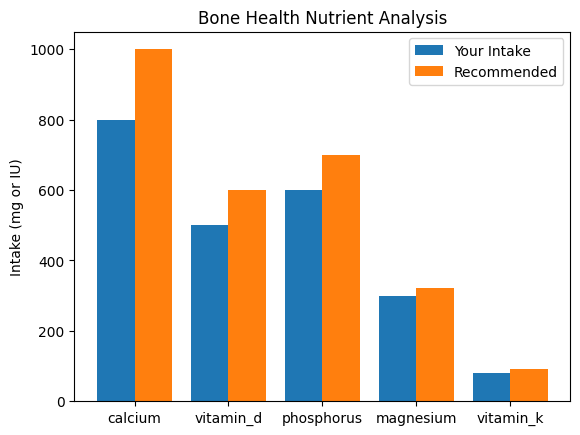

Food Recommendations: {'calcium': ['Milk', 'Yogurt', 'Cheese', 'Tofu', 'Leafy greens'], 'vitamin_d': ['Salmon', 'Mushrooms', 'Fortified milk', 'Egg yolks'], 'phosphorus': ['Chicken', 'Fish', 'Nuts', 'Beans', 'Dairy'], 'magnesium': ['Almonds', 'Spinach', 'Avocados', 'Bananas'], 'vitamin_k': ['Kale', 'Broccoli', 'Brussels sprouts', 'Natto']}


In [ ]:
# Bone Health Nutrient Analyzer Integration

import matplotlib.pyplot as plt
import numpy as np

def analyze_bone_health(nutrient_intake, age, gender):
    """Analyzes bone health based on nutrient intake, age, and gender."""
    recommended_intake = {
        "calcium": 1000 if age < 50 else 1200,
        "vitamin_d": 600 if age < 70 else 800,
        "phosphorus": 700,
        "magnesium": 320 if gender == 'female' else 420,
        "vitamin_k": 90 if gender == 'female' else 120,
    }

    deficiencies = {}
    for nutrient, value in nutrient_intake.items():
        if value < recommended_intake[nutrient]:
            deficiencies[nutrient] = recommended_intake[nutrient] - value

    return deficiencies

def generate_chart(nutrient_intake, age, gender):
    """Generates a progress chart for nutrient intake."""
    nutrients = list(nutrient_intake.keys())
    values = list(nutrient_intake.values())
    recommended_values = [1000 if n == 'calcium' else
                          600 if n == 'vitamin_d' else
                          700 if n == 'phosphorus' else
                          (320 if gender == 'female' else 420) if n == 'magnesium' else
                          (90 if gender == 'female' else 120) for n in nutrients]

    x = np.arange(len(nutrients))
    plt.bar(x - 0.2, values, 0.4, label='Your Intake')
    plt.bar(x + 0.2, recommended_values, 0.4, label='Recommended')
    plt.xticks(x, nutrients)
    plt.ylabel('Intake (mg or IU)')
    plt.title('Bone Health Nutrient Analysis')
    plt.legend()
    plt.show()


def food_recommendations(deficiencies):
    """Provides food recommendations based on deficiencies."""
    food_sources = {
        "calcium": ["Milk", "Yogurt", "Cheese", "Tofu", "Leafy greens"],
        "vitamin_d": ["Salmon", "Mushrooms", "Fortified milk", "Egg yolks"],
        "phosphorus": ["Chicken", "Fish", "Nuts", "Beans", "Dairy"],
        "magnesium": ["Almonds", "Spinach", "Avocados", "Bananas"],
        "vitamin_k": ["Kale", "Broccoli", "Brussels sprouts", "Natto"],
    }

    recommendations = {}
    for nutrient, deficiency in deficiencies.items():
        recommendations[nutrient] = food_sources.get(nutrient, [])

    return recommendations

# Example Usage
nutrient_intake = {"calcium": 800, "vitamin_d": 500, "phosphorus": 600, "magnesium": 300, "vitamin_k": 80}
age = 30
gender = "female"

deficiencies = analyze_bone_health(nutrient_intake, age, gender)
print("Deficiencies Detected:", deficiencies)

generate_chart(nutrient_intake, age, gender)

recommendations = food_recommendations(deficiencies)
print("Food Recommendations:", recommendations)


In [ ]:
import pandas as pd

def classify_bmd(bmd_value):
    if bmd_value >= -1.0:
        return "Normal"
    elif -2.5 < bmd_value < -1.0:
        return "Osteopenia"
    else:
        return "Osteoporosis"

def get_nutrient_recommendations(bmd_category):
    recommendations = {
        "Normal": {"Calcium": "1000 mg", "Vitamin D": "600 IU", "Magnesium": "310-420 mg"},
        "Osteopenia": {"Calcium": "1200 mg", "Vitamin D": "800 IU", "Magnesium": "320-420 mg"},
        "Osteoporosis": {"Calcium": "1200-1500 mg", "Vitamin D": "1000 IU", "Magnesium": "400-500 mg"}
    }
    return recommendations.get(bmd_category, {})

def analyze_bone_health(data):
    data["BMD Category"] = data["bmd"].apply(classify_bmd)
    data["Nutrient Recommendations"] = data["BMD Category"].apply(get_nutrient_recommendations)
    return data

# Load dataset
df = pd.read_csv("/content/bmd.csv")  # Ensure correct file path

# Run analysis
df = analyze_bone_health(df)
print(df[["id", "age", "sex", "bmd", "BMD Category", "Nutrient Recommendations"]])


        id        age sex     bmd BMD Category  \
0      469  57.052768   F  0.8793       Normal   
1     8724  75.741225   F  0.7946       Normal   
2     6736  70.778900   M  0.9067       Normal   
3    24180  78.247175   F  0.7112       Normal   
4    17072  54.191877   M  0.7909       Normal   
..     ...        ...  ..     ...          ...   
164  21892  77.982543   M  0.7941       Normal   
165  24140  50.285303   F  0.7971       Normal   
166   6969  46.359721   M  0.8037       Normal   
167   5505  54.788368   M  0.8072       Normal   
168     71  69.994822   F  0.8664       Normal   

                              Nutrient Recommendations  
0    {'Calcium': '1000 mg', 'Vitamin D': '600 IU', ...  
1    {'Calcium': '1000 mg', 'Vitamin D': '600 IU', ...  
2    {'Calcium': '1000 mg', 'Vitamin D': '600 IU', ...  
3    {'Calcium': '1000 mg', 'Vitamin D': '600 IU', ...  
4    {'Calcium': '1000 mg', 'Vitamin D': '600 IU', ...  
..                                                 ...  


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/bmd.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display dataset information
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [ ]:
#Step 1: Data Cleaning & Preprocessing

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/bmd.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# 1. Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# 2. Convert categorical variables to numerical
label_enc = LabelEncoder()

df['sex'] = label_enc.fit_transform(df['sex'])  # F -> 0, M -> 1
df['fracture'] = label_enc.fit_transform(df['fracture'])  # "no fracture" -> 0, "fracture" -> 1
df['medication'] = label_enc.fit_transform(df['medication'])  # Encode medication categories

# 3. Verify cleaned data
print("\nProcessed Data Sample:\n", df.head())

# Save the cleaned dataset
df.to_csv("cleaned_bmd.csv", index=False)


Missing Values:
 id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

Processed Data Sample:
       id        age  sex  fracture  weight_kg  height_cm  medication  \
0    469  57.052768    0         1       64.0      155.5           0   
1   8724  75.741225    0         1       78.0      162.0           2   
2   6736  70.778900    1         1       73.0      170.5           2   
3  24180  78.247175    0         1       60.0      148.0           2   
4  17072  54.191877    1         1       55.0      161.0           2   

   waiting_time     bmd  
0            18  0.8793  
1            56  0.7946  
2            10  0.9067  
3            14  0.7112  
4            20  0.7909  


In [ ]:
#Step 2: Define Input & Target Variables

from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = df[['age', 'weight_kg', 'height_cm', 'sex', 'medication', 'fracture']]  # Input features
y = df['bmd']  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (135, 6)
Testing Data Shape: (34, 6)


In [ ]:
#Step 3: Build a Prediction Model for BMD

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Identify categorical and numerical features
categorical_features = ['sex', 'medication', 'fracture']
numerical_features = ['age', 'weight_kg', 'height_cm']

# One-Hot Encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the prediction model (Random Forest Regressor)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean Absolute Error: 0.0865


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
#Train and Save the Model

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "bmd.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Convert categorical data (sex, medication) into numerical form
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
df['medication'] = df['medication'].astype('category').cat.codes  # Encode medication types

# Define features (X) and target (y)
X = df[['age', 'weight_kg', 'height_cm', 'sex', 'medication']]
y = df['bmd']

# Split the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "bmd_model.pkl")

print("Model trained and saved successfully as bmd_model.pkl")


Model trained and saved successfully as bmd_model.pkl


In [ ]:
#Check If Model is Saved

import os
print(os.listdir())  # List all files in the current directory


['.config', 'test.csv', 'bmd.csv', 'cleaned_bmd.csv', 'bmd_model.pkl', '.ipynb_checkpoints', 'SR_Legacy.accdb', 'sample_data']


In [ ]:
#UI Integration

import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load the trained BMD prediction model
model = joblib.load("bmd_model.pkl")  # Ensure you've saved your trained model

# Function to predict BMD
def predict_bmd(age, weight, height, sex, medication):
    input_data = pd.DataFrame([[age, weight, height, sex, medication]],
                              columns=['age', 'weight_kg', 'height_cm', 'sex', 'medication'])
    bmd_pred = model.predict(input_data)[0]

    # Categorize BMD
    if bmd_pred >= -1.0:
        category = "Normal"
    elif -2.5 < bmd_pred < -1.0:
        category = "Osteopenia"
    else:
        category = "Osteoporosis"

    return bmd_pred, category

# Streamlit UI
st.title("Bone Mineral Density (BMD) Estimator")

# User Inputs
age = st.number_input("Enter Age", min_value=18, max_value=100, value=50)
weight = st.number_input("Enter Weight (kg)", min_value=30, max_value=150, value=70)
height = st.number_input("Enter Height (cm)", min_value=100, max_value=220, value=170)
sex = st.selectbox("Select Sex", ["M", "F"])
medication = st.selectbox("Medication Type", ["No medication", "Anticonvulsant", "Glucocorticoids"])

# Prediction Button
if st.button("Predict BMD"):
    bmd_value, bmd_category = predict_bmd(age, weight, height, sex, medication)
    st.write(f"### Predicted BMD: {bmd_value:.4f}")
    st.write(f"### BMD Category: **{bmd_category}**")

    # Display BMD category with color indicator
    if bmd_category == "Normal":
        st.success("Your BMD is in the Normal range! 🦴✅")
    elif bmd_category == "Osteopenia":
        st.warning("Your BMD indicates Osteopenia. Consider improving bone health! ⚠️")
    else:
        st.error("Your BMD indicates Osteoporosis. Please consult a doctor. 🚨")

# Run the app with: `streamlit run app.py`


2025-02-14 11:55:15.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.833 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 11:55:15.845 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
#Create the Prediction Function

import joblib
import numpy as np

# Load the trained model
model = joblib.load("bmd_model.pkl")

# Function to predict BMD based on user input
def predict_bmd(age, weight_kg, height_cm, sex, medication):
    # Convert categorical inputs
    sex = 0 if sex.lower() == 'm' else 1
    medication_mapping = {"No medication": 0, "Anticonvulsant": 1, "Glucocorticoids": 2}
    medication = medication_mapping.get(medication, 0)  # Default to "No medication"

    # Create input array
    user_data = np.array([[age, weight_kg, height_cm, sex, medication]])

    # Predict BMD
    predicted_bmd = model.predict(user_data)[0]

    return predicted_bmd

# Example test
print("Predicted BMD:", predict_bmd(60, 70, 160, 'M', "No medication"))


Predicted BMD: 0.8385662123766288


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Classify BMD into Categories

def classify_bmd(bmd_value):
    if bmd_value >= -1.0:
        return "Normal"
    elif -2.5 < bmd_value < -1.0:
        return "Osteopenia (Low Bone Mass)"
    else:
        return "Osteoporosis (High Risk)"

# Example test
bmd_test = predict_bmd(60, 70, 160, 'M', "No medication")
category = classify_bmd(bmd_test)
print(f"BMD Value: {bmd_test}, Category: {category}")


BMD Value: 0.8385662123766288, Category: Normal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Provide Nutrient Recommendations

def recommend_nutrients(bmd_category):
    recommendations = {
        "Normal": ["Maintain a balanced diet rich in Calcium, Vitamin D, and Magnesium."],
        "Osteopenia (Low Bone Mass)": [
            "Increase Calcium intake (1200mg/day).",
            "Get 800-1000 IU of Vitamin D per day.",
            "Eat phosphorus-rich foods like dairy and fish."
        ],
        "Osteoporosis (High Risk)": [
            "Ensure 1500mg of Calcium per day (consider supplements).",
            "Vitamin D (1000 IU+) and Vitamin K for bone strength.",
            "Magnesium & Phosphorus for mineral balance.",
            "Consult a doctor for possible medication."
        ]
    }

    return recommendations.get(bmd_category, ["No specific recommendations."])

# Example test
bmd_test = predict_bmd(60, 70, 160, 'M', "No medication")
category = classify_bmd(bmd_test)
nutrient_recs = recommend_nutrients(category)

print(f"BMD Value: {bmd_test}, Category: {category}")
print("Recommended Nutrients:", nutrient_recs)


BMD Value: 0.8385662123766288, Category: Normal
Recommended Nutrients: ['Maintain a balanced diet rich in Calcium, Vitamin D, and Magnesium.']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
!streamlit run bmd_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: bmd_app.py
